In [458]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

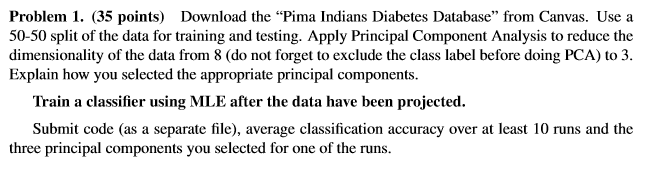

In [459]:
from sklearn.model_selection import train_test_split

In [460]:
#Importing the data
pima=pd.read_csv("diabetes.csv")

In [461]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [462]:
X_train,X_test=train_test_split(pima, test_size=0.5)
X=X_train.iloc[:,0:8]

In [463]:
#Re-center:subtracting mean from each row of X
MeanVector=np.mean(X,axis=0)
MeanVector=MeanVector.to_numpy().reshape(MeanVector.shape[0],1)
X_1=X-MeanVector.T


In [464]:
#calculating the variance of the dataset
cov_X=np.cov(X_1.T)
eigen_vectors=np.linalg.eig(cov_X)
[v,ev,u]=np.linalg.svd(cov_X)
Eigen_vectors=v[:,:3]
X_PCA=np.dot(X,Eigen_vectors)

In [465]:
#we have calculated the eigen vectors using SVD and took first three eigen vectors which corresponds ot highest eigen values

In [466]:
data = {'Feature1':X_PCA[:,0],
        'Feature2':X_PCA[:,1],
        'Feature3':X_PCA[:,2],
        'Outcome':X_train["Outcome"].to_numpy()}
df = pd.DataFrame(data)

In [467]:
#converted DataFrame with PCA components 
df

,Feature1,Feature2,Feature3,Outcome
0,125.999973,-133.803366,76.836353,1
1,12.382251,-129.397113,59.974466,0
2,155.768510,-139.485718,85.655764,1
3,68.696245,-90.787178,74.003729,0
4,128.338190,-107.817167,43.602772,0
...,...,...,...,...
379,495.424481,-137.782348,32.674755,1
380,244.764964,-113.644426,62.687256,0
381,126.006314,-123.233987,56.648524,0
382,12.362226,-124.973860,69.602330,0


In [468]:
X_trainA=df[df["Outcome"]==0]
X_trainB=df[df["Outcome"]==1]

In [469]:
#calculating the prior probability of the classes
prior_prob_A=X_trainA.shape[0]/(X_trainA.shape[0]+X_trainB.shape[0])
prior_prob_B=X_trainB.shape[0]/(X_trainA.shape[0]+X_trainB.shape[0])

In [470]:
#mean of the features of classA
meanVarA1=np.mean(X_trainA.iloc[:,0],axis=0)
meanVarA2=np.mean(X_trainA.iloc[:,1],axis=0)
meanVarA3=np.mean(X_trainA.iloc[:,2],axis=0)
#mean of the features of classB
meanVarB1=np.mean(X_trainB.iloc[:,0],axis=0)
meanVarB2=np.mean(X_trainB.iloc[:,1],axis=0)
meanVarB3=np.mean(X_trainB.iloc[:,2],axis=0)

In [471]:
#function which takes "mean" and "covariance" as the parameters and returns the likelihood of the Feature Vector
def likelihood(x,mu,co):
    #inverse of the covariance matrix
    inv=np.linalg.inv(co)
    p1=1/(np.sqrt(((2*np.pi)**3)*np.linalg.det(co)))
    p2=np.exp(-0.5*np.dot(np.dot((x-mu).T,inv),(x-mu)))
    p=p1*p2
    return p

In [472]:
#defining the meanVector which stacked all the means of the taken Features
MeanVectorA=np.array([[meanVarA1,meanVarA2,meanVarA3]])
MeanVectorB=np.array([[meanVarB1,meanVarB2,meanVarB3]])
#calculating the covariance matrix for both classes(A and B)
covA=np.cov(X_trainA.iloc[:,:3].T)
covB=np.cov(X_trainB.iloc[:,:3].T)

In [473]:
X_trainA.iloc[:,:3]

,Feature1,Feature2,Feature3
1,12.382251,-129.397113,59.974466
3,68.696245,-90.787178,74.003729
4,128.338190,-107.817167,43.602772
5,12.250079,-121.013705,-12.491624
8,201.534256,-109.440150,52.830935
...,...,...,...
377,13.524435,-132.423138,-14.426538
378,131.990814,-104.304786,24.935504
380,244.764964,-113.644426,62.687256
381,126.006314,-123.233987,56.648524


In [474]:
postA=likelihood(a,MeanVectorA.T,covA)*prior_prob_A
postB=likelihood(a,MeanVectorB.T,covB)*prior_prob_B

In [475]:
print(postA)
print(postB)

[[9.46983068e-19]]
[[2.40312378e-13]]


In [476]:
##Testing one test sample on the classsifier
a=X_trainA.iloc[25,:3].to_numpy().reshape(X_trainA.shape[1]-1,1)
postA=likelihood(a,MeanVectorA.T,covA)*prior_prob_A
postB=likelihood(a,MeanVectorB.T,covB)*prior_prob_B
if(postA<postB):
    print("Class B")
else:
    print("Class A")

Class A


In [477]:
#Testing on the test dataset
X_testA=X_test.iloc[:,:8]
def accuracy(X_test,MeanVectorA,meanVectorB,covA,covB,prior_prob_A,prior_prob_B):
    X_testA=X_test.iloc[:,:8]
    Xtest_pca=np.dot(X_testA,Eigen_vectors)
    count=0
    ##Testing one test sample on the classsifier
    for i in range(X_test.shape[0]):
        #a=X_trainA.iloc[25,:3].to_numpy().reshape(X_trainA.shape[1]-1,1)
        a=Xtest_pca[i,:].reshape(Xtest_pca.shape[1],1)
        postA=likelihood(a,MeanVectorA.T,covA)*prior_prob_A
        postB=likelihood(a,MeanVectorB.T,covB)*prior_prob_B
        if(postA<postB):
            if(X_test.iloc[i,8]==1):
                count+=1
        else:
            if(X_test.iloc[i,8]==0):
                count+=1
    accurate=count/X_test.shape[0]
    return accurate
    

In [478]:
accuracy(X_test,MeanVectorA,MeanVectorB,covA,covB,prior_prob_A,prior_prob_B)

0.7473958333333334